# Chapter 05 확률

## 5-1 시행과 사건

### 시행 (trial)

동일한 조건 아래서 반복할 수 있으며, 그 결과가 우연에 의해 달라질 수 있는 실험 또는 관찰

### [실습] 예제 5-1: 주사위를 두 번 반복하여 던지는 시행
주사위를 두 번 반복하여 던지는 시행에서 나타날 수 있는 모든 경우 나타내기

In [4]:
d1 = list(range(1, 7))
d2 = list(range(1, 7))

for i in d1:
    for j in d2:
        print(f'({i},{j})', end=' ')
    print()

(1,1) (1,2) (1,3) (1,4) (1,5) (1,6) 
(2,1) (2,2) (2,3) (2,4) (2,5) (2,6) 
(3,1) (3,2) (3,3) (3,4) (3,5) (3,6) 
(4,1) (4,2) (4,3) (4,4) (4,5) (4,6) 
(5,1) (5,2) (5,3) (5,4) (5,5) (5,6) 
(6,1) (6,2) (6,3) (6,4) (6,5) (6,6) 


In [1]:
# 주사위에서 나올 수 있는 경우의 수
# 방법1
D1 = list(range(1,7))
D2 = list(range(1,7))
print(f'첫번째 주사위 경우 수: {D1}')
print(f'첫번째 주사위 경우 수: {D2}')
print('-'*50)

for i in D1 :
    for j in D2:   
        print(f'({i},{j})', end=' ')
    print()


첫번째 주사위 경우 수: [1, 2, 3, 4, 5, 6]
첫번째 주사위 경우 수: [1, 2, 3, 4, 5, 6]
--------------------------------------------------
(1,1) (1,2) (1,3) (1,4) (1,5) (1,6) 
(2,1) (2,2) (2,3) (2,4) (2,5) (2,6) 
(3,1) (3,2) (3,3) (3,4) (3,5) (3,6) 
(4,1) (4,2) (4,3) (4,4) (4,5) (4,6) 
(5,1) (5,2) (5,3) (5,4) (5,5) (5,6) 
(6,1) (6,2) (6,3) (6,4) (6,5) (6,6) 


https://docs.python.org/ko/3/library/itertools.html


In [24]:
# 방법2
import itertools

D1 = list(range(1,7))
D2 = list(range(1,7))
outcomes = list(itertools.product(D1, D2)) # itertools.product(D1, repeate=2)
for idx, d in enumerate(outcomes):
    if idx%6==0: print()
    print(d, end = ' ')


(1, 1) (1, 2) (1, 3) (1, 4) (1, 5) (1, 6) 
(2, 1) (2, 2) (2, 3) (2, 4) (2, 5) (2, 6) 
(3, 1) (3, 2) (3, 3) (3, 4) (3, 5) (3, 6) 
(4, 1) (4, 2) (4, 3) (4, 4) (4, 5) (4, 6) 
(5, 1) (5, 2) (5, 3) (5, 4) (5, 5) (5, 6) 
(6, 1) (6, 2) (6, 3) (6, 4) (6, 5) (6, 6) 

--------

### 사건 (event)

- 사건: 표본공간의 부분집합
- 표본공간(Sample space) : 어떤 시행 결과로 기록되거나 관찰될 수 있는 모든 결과들의 집합
- 원소(element) or 표본점(sample point) : 시행에서 나타날 수 있는 개개의 결과 


#### 동전 반복해서 두 번 던지는 모든 사건 

In [6]:
from itertools import product, chain, combinations

# 표본공간 
def get_subsets(t, r):    
    S = list(product(t, repeat=r))  # itertools.product(a,a,a) 순열 계산
    S = [''.join(s) for s in S]   #  ('H,'H')-->'HH'로 표현
    return S

# 모든 사건
def get_set_of_subsets(S):    
    return set( [frozenset(s) for s in chain.from_iterable(combinations(S, r)
                                                          for r in range(len(S)+1))] )

    
# 동전 던지기
t = {'H', 'T'} # coin
r = 2          # repeat
S = get_subsets(t, r)
print(f'동전 {r}번 던지는 표본공간(S): {set(S)}')

events = get_set_of_subsets(S)
events


동전 2번 던지는 표본공간(S): {'HT', 'HH', 'TT', 'TH'}


{frozenset(),
 frozenset({'TH'}),
 frozenset({'TH', 'TT'}),
 frozenset({'HT'}),
 frozenset({'HH', 'HT', 'TT'}),
 frozenset({'HH', 'TH'}),
 frozenset({'TT'}),
 frozenset({'HT', 'TH'}),
 frozenset({'HT', 'TH', 'TT'}),
 frozenset({'HH'}),
 frozenset({'HH', 'TT'}),
 frozenset({'HT', 'TT'}),
 frozenset({'HH', 'HT'}),
 frozenset({'HH', 'HT', 'TH'}),
 frozenset({'HH', 'TH', 'TT'}),
 frozenset({'HH', 'HT', 'TH', 'TT'})}

### [실습] 예제 5-3: 동전 세 번 던지는 사건
- 표본공간(Ω, S) : 전체 사건 
- 사건(A): 적어도 앞면이 2번 이상 나오는 사건 

In [10]:
import itertools

t = 'HT'  # ['H', 'T']
r = 3
p = 2

S = list(itertools.product(t, repeat=r))  # itertools.product(a,a,a) 중복순열
A = [a.count('H') for a in S ]

S = [''.join(s) for s in S]   #  ('H,'H','H')-->'HHH'로 표현
print(f'동전 세번 던지는 표본공간(S): {set(S)}')

A = [ S[idx] for idx, a in enumerate(A) if a >= p ] #enumerate는 인덱스와 원소를 동시에 접근함
print(f'적어도 두번 앞면이 나오는 사건(A): {set(A)}')


동전 세번 던지는 표본공간(S): {'TTT', 'HTT', 'HHT', 'TTH', 'THT', 'THH', 'HHH', 'HTH'}
적어도 두번 앞면이 나오는 사건(A): {'HHH', 'HTH', 'HHT', 'THH'}


In [23]:
t = 'HT'
r = 3
p = 2 #사건

S = list(itertools.product(t, repeat=r))
S = [''.join(s) for s in S]
print(f'동전을 세 번 반복하여 던지는 게임에서의 표본공간(S): {S}')

A = [a.count('H') for a in S]
A = [S[idx] for idx, a in enumerate(A) if a >= p]





동전을 세 번 반복하여 던지는 게임에서의 표본공간(S): ['HHH', 'HHT', 'HTH', 'HTT', 'THH', 'THT', 'TTH', 'TTT']
['HHH', 'HHT', 'HTH', 'THH']


### [실습] 예제 5-4: 주사위를 던지는 실험에서의 사건
1. $A ∩ B$
2. $A ∪ B$
3. $𝐴^𝑐$  
4. $B - C$
5. 배반인 두 사건   

In [11]:
#주사위를 던지는 실험
S = {1,2,3,4,5,6}  #표본공간=전체집합
A = {1,2,3,4}
B = {4,5}
C = {5,6}

#### A ∩ B: (곱사건 : 교집합)

In [12]:
#  A ∩ B: (곱사건 : 교집합)
print(A & B)
print(A.intersection(B))

{4}
{4}


#### A ∪ B (합사건 : 합집합)

In [13]:
# A ∪ B (합사건 : 합집합)
print(A | B)
print(A.union(B))

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}


#### $𝐴^𝑐$ (여사건 : 여집합)

In [14]:
# A^𝑐 (여사건 : 여집합)
print(S - A)
print(S.difference(A))

{5, 6}
{5, 6}


#### B - C (차사건 : 차집합)

In [15]:
# B - C (차사건 : 차집합)
print(B - C)
print(B.difference(C))

{4}
{4}


#### A ∩ C  = ∅ (배반인 두 사건 : 공집합)

In [16]:
# A ∩ C = ∅ (배반인 두 사건 : 공집합)
print(A & C, '--> 공집합' )
print(A | C, '--> 표본공간')
print('A와 C는 S의 분할(partition)')

set() --> 공집합
{1, 2, 3, 4, 5, 6} --> 표본공간
A와 C는 S의 분할(partition)


### 사건의 연산 

 - 합사건의 성질
 - 곱사건의 성질
 - 분배법칙
 - 드모르간의 법칙

### [실습] 분배법칙이 성립하는지 파이썬 코드로 증명하여라
다음 세 집합 A, B, C에 대해서 분배법칙이 성립하는지 파이썬 코드로 증명하기
- $A∪(B∩C)$ 
- $A∩(B∪C)$

In [11]:
A = {1,3,5}
B = {1,2,3}
C = {2,4,6}

one = (A|B)&C == (A&C)|(B&C)
two = (A&B)|C == (A|C)&(B|C)

print(one)
print(two)

True
True


### [실습] 예제 5-5:  사건의 연산
- a. $A ∩ B ∩ C$ 
- b. $(A∪B)∩ C$
- c. $(A ∩ C)^𝑐$
- d. $(A∪B)^𝑐$

In [ ]:
#주사위를 던지는 실험
S = {1,2,3,4,5,6}  #표본공간=전체집합
A = {1,3,4}
B = {4,5}
C = {3,4,6}

In [17]:
#(a). A ∩ B ∩ C
print(f'a. A ∩ B ∩ C: {A & B & C}')

#(b). (A∪B)∩ C
print(f'b. (A∪B)∩ C:  {(A|B) & C}')

#(c). (A ∩ C)^𝑐
print(f'c. (A ∩ C)^𝑐: {S - (A&C)}')
print(f'c. (A ∩ C)^𝑐: {(S-A) | (S-C)}')

#(d). (A∪B)^𝑐
print(f'd. (A∪B)^𝑐: {S - (A|B)}')
print(f'd. (A∪B)^𝑐: {(S-A) & (S-B)}')

a. A ∩ B ∩ C: set()
b. (A∪B)∩ C:  {5}
c. (A ∩ C)^𝑐: {1, 2, 3, 4, 5, 6}
c. (A ∩ C)^𝑐: {1, 2, 3, 4, 5, 6}
d. (A∪B)^𝑐: {6}
d. (A∪B)^𝑐: {6}


--------

## 5-2 확률
- **확률(Probability)이란 사건(부분집합)을 입력하면 숫자(확률값)가 출력되는 함수**이다.
- 즉, 모든 각각의 사건(부분집합)에 어떤 숫자를 할당하는 함수가 확률이다.

### 확률의 의미 - 수학적 확률


### [실습] 예제 5-6: 주사위 던지는 사건
- 주사위를 반복해서 세 번 던져서 적어도 두번 앞면에 나오는 확률

In [28]:
import itertools

def P(t, r, p):  #샘플, 시행횟수, 사건횟수 
    S = list(itertools.product(t, repeat=r))  # 표본공간
    A = [a.count('H') for a in S ]            # 사건

    # 표본공간 출력
    S = [''.join(s) for s in S]   #  ('H,'H','H')-->'HHH'로 표현
    print(f'동전 {r}번 던지는 전체 사건 S: {len(S)}')

    # 사건 출력
    A = [ S[idx] for idx, a in enumerate(A) if a >= p]
    print(f'적어도 {p}번 앞면이 나오는 사건 A: {len(A)}')

    # 사건 확률
    print(f'적어도 {p}번 앞면이 나오는 확률: {len(A)/len(S)}')
    
    return len(A)/len(S)

# t = 'HT'  # ['H', 'T']
# r = 3     # 동전 몇 번 던지는가
# p = 2     # 앞면이 몇번 나오는가
P(['H', 'T'], 3, 2)


동전 3번 던지는 전체 사건 S: 8
적어도 2번 앞면이 나오는 사건 A: 4
적어도 2번 앞면이 나오는 확률: 0.5


0.5

In [29]:
t = 'HT'
r = 3
p = 2

S = list(itertools.product(t,repeat=r))
S = [''.join(s) for s in S]

A = [a.count('T') for a in S]
A = [S[idx] for idx, a in enumerate(A) if a >= p]
print(len(A)/len(S))


0.5


### 확률의 의미 - 통계적 확률

### 시행회수 중가에 따른 확률의 변화 
- 주사위 던지는 시행 횟수가 많아질수로 앞면에 나오는 확률은 0.5에 가까워진다.

In [47]:
import random
import math

ns = [50,100,500,1000,2000,2500,5000,10000] # 시행횟수
rs = []   # 앞면의 수
ps = []   # 앞면의 상대도수

for n in ns:
    tmp= []
    for i in range(n):
        tmp.append( random.choice(['H','T']) )
    r = tmp.count('H')
    rs.append(round(r))
    ps.append(round(r/n,3))


# pandas 테이블 형태로 보여주기    
import pandas as pd
dics = dict()
for idx, n in enumerate(ns):
    key = ns[idx]
    values = [rs[idx], ps[idx]]
    dics[key] = values

df = pd.DataFrame(dics, columns=ns, index=['앞면의수','앞면의상대도수'])
df

,50,100,500,1000,2000,2500,5000,10000
앞면의수,24.00,51.00,243.000,503.000,975.000,1233.000,2495.000,4991.000
앞면의상대도수,0.48,0.51,0.486,0.503,0.487,0.493,0.499,0.499


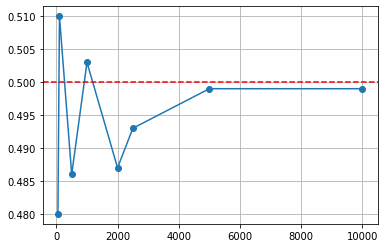

In [50]:
import matplotlib.pyplot as plt
    
x = ns
y = ps

plt.plot(x, y, 'o', linestyle='solid' )
plt.axhline(0.5, c='r', ls='--')
plt.grid()
plt.show()

### 확률의 성질

#### 임의의 세 사건 A, B, C에 다음이 성립한다.

In [30]:
A = {1,2,3}
B = {2,3,4}
C = {3,4,5}

S = A | B | C
print(S)

{1, 2, 3, 4, 5}
